# IMPORTING LIBRARIES

In [3]:
import pandas as pd       #it is used for working with large,labeled datasets
import numpy as np        #It provides arrays and mathematical functions for performing complex calculations.
import matplotlib.pyplot as plt  #It provides functions for creating a variety of plots, such as line charts, bar charts, and histograms.
import seaborn as sns     #it is used for for statistical data visualization
import random             #for generating random numbers and other random data.
from PIL import Image     #It provides functions for loading, saving, and manipulating images.[Python Imaging Library]
import warnings           #Library for handling warnings
import pickle             # It can be used to save and load machine learning models.
import os                 #It provides functions for creating and deleting files and directories.
import cv2                # It provides functions for image processing, video analysis, and object detection.
from tqdm import tqdm     #library for displaying progress bars. It can be used to show the progress of long-running tasks.

# It provides a variety of algorithms for classification, regression, clustering, and other machine learning tasks.

from sklearn.model_selection import train_test_split #This function is used to split a dataset into two subsets: a training set and a test set.
from sklearn.utils import shuffle# This module shuffles the rows of a NumPy array or a Pandas DataFrame in a consistent way. 
from sklearn.metrics import accuracy_score ,confusion_matrix ,classification_report # used to evaluate the performance of classification models.
from sklearn.linear_model import LogisticRegression  # implements logistic regression, a supervised learning algorithm used for classification tasks.
from sklearn.svm import SVC         #SVC stands for Support Vector Classification.
from sklearn.ensemble import RandomForestClassifier # This algorithm that uses an ensemble of decision trees to make predictions. 
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis   # LDA is a supervised learning algorithm that can be used for both classification and dimensionality reduction.
from sklearn.neighbors import KNeighborsClassifier  # A Python class from the scikit-learn library that implements the k-nearest neighbors (KNN) classification algorithm
from sklearn.naive_bayes import GaussianNB  # A Python class from the scikit-learn library that implements the Gaussian Naive Bayes classification algorithm
from xgboost import XGBClassifier   # A Python class from the XGBoost library that implements the extreme gradient boosting classification algorithm.


import tensorflow as tf  #  TensorFlow is an open-source software library for numerical computation using data flow graphs. It is used for machine learning and deep learning,
from tensorflow.keras.models import Sequential  #The Sequential class from tensorflow.keras.models is used to create a sequential model, which is a linear stack of layers

from tensorflow.keras.layers import Dense,Conv2D,Flatten,Dropout,BatchNormalization,MaxPooling2D
from tensorflow.keras.utils import to_categorical  #TensorFlow's Keras library converts a class vector (integers) to a binary class matrix. 
from tensorflow.keras.layers import Input,Dense  #Input and Dense are two important layer of Tenserflow Library.They are used to create input and hidden layers respectively.
from tensorflow.keras.models import Model  #used to create and manage neural network models.
from tensorflow.keras.optimizers import Adam #Adam optimizer is a stochastic gradient descent (SGD) optimizer .
from tensorflow.keras.preprocessing.image import ImageDataGenerator #LDA is a supervised learning algorithm that can be used for both classification and dimensionality reduction.#used to perform a variety of operations, such as resizing images, normalizing data, and applying data augmentation techniques.
from tensorflow.keras.metrics import categorical_crossentropy #is a metric that can be used to measure the performance of a classification model.
from tensorflow.keras.layers import Dropout  #can be used to improve the performance of neural networks. It works by randomly dropping out neurons during training, which forces the remaining neurons to learn more robust features.
warnings.filterwarnings('ignore') # allows you to control the display of warning messages. When you call this function with the 'ignore' argument, it tells Python to ignore all warning messages.

# CHECKING NOISE IN THE IMAGES

# USING STANDARD DEVIATION

In [4]:
import os
import cv2
import numpy as np
no_noisy_image_count = 0
noisy_image_count=0

# Function to calculate the standard deviation of an image
def calculate_std_dev(image_path):
    img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    std_dev = np.std(img)
    return std_dev

# Directory path containing the subfolders
base_directory = r"C:\Users\swapa\Documents\Brain Tumor Classification\Training"

# List of subfolders
subfolders =os.listdir(base_directory)

# Loop through each subfolder and check images for noise
for subfolder in subfolders:
    subfolder_path = os.path.join(base_directory, subfolder)
    
    # List all files in the subfolder
    files = os.listdir(subfolder_path)
    
    for file in files:
        if file.endswith(".jpg"):
            image_path = os.path.join(subfolder_path, file)
            std_dev = calculate_std_dev(image_path)
            
            noise_threshold = 95  
            
            if std_dev > noise_threshold: #Standard deviation in images tells us how much the pixel values vary from the average brightness of the image. A high standard deviation means the image is more contrasting, while a low standard deviation means the image is more uniform.
               # print(f"Noise detected in {image_path} (Standard Deviation: {std_dev})")
                noisy_image_count=noisy_image_count+1;
            else:
                #print(f"No noise detected in {image_path} (Standard Deviation: {std_dev})")
                no_noisy_image_count=no_noisy_image_count+1;
  # Print the total count of noisy images
print(f"Total no_noisy images: {no_noisy_image_count}")
print(f"Total noisy images:{noisy_image_count}")


Total no_noisy images: 2870
Total noisy images:0


# USING QUALITY MATRIX

In [5]:
import os  # Imports the 'os' module, which is used for various file and directory operations.
import cv2 #Imports the OpenCV library, which is commonly used for computer vision tasks.
from skimage.metrics import structural_similarity as ssim  # Imports the 'structural_similarity' function from the 'skimage.metrics' module and aliases it as 'ssim' for easier usage.
import numpy as np  # Imports the 'numpy' library and aliases it as 'np', which is often used for numerical operations.

# Directory path containing the subfolders
base_directory = r"C:\Users\swapa\Documents\Brain Tumor Classification\Training"  # Sets the 'base_directory' variable to the path of the directory containing subfolders of images. This is where the script will look for images to process.

# List of subfolders
subfolders =os.listdir(base_directory) # Lists all the subfolders within the 'base_directory' and stores them in the 'subfolders' variable.
noisy_image_count = 0  #Initializes a counter for noisy images to zero.
non_noisy_image_count = 0  #Initializes a counter for non-noisy images to zero.

# Define a threshold for SSIM to determine if an image has noise
noise_threshold = 0.2  #Defines a threshold value for the Structural Similarity Index (SSIM) below which an image is considered noisy. The SSIM ranges from -1 to 1, with values closer to 1 indicating higher similarity and values closer to -1 indicating dissimilarity.

# Loop through each subfolder
for subfolder in subfolders:  #Iterates through each subfolder in the 'base_directory'.
    subfolder_path = os.path.join(base_directory, subfolder)  #Constructs the full path to the current subfolder.

    # Loop through each image in the subfolder
    for filename in os.listdir(subfolder_path):  #Iterates through each file in the current subfolder.
        if filename.endswith('.jpg'):  #Checks if the current file is a JPEG image (based on the file extension).
            image_path = os.path.join(subfolder_path, filename)  #os.path.join(subfolder_path, filename): Constructs the full path to the current image file.

            # Read the image
            image = cv2.imread(image_path)  # Reads the image using OpenCV and stores it in the 'image' variable.

            # Convert the image to grayscale (SSIM is typically calculated on grayscale images)
            gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)  # Converts the color image to grayscale, as SSIM is typically calculated on grayscale images. The result is stored in the 'gray_image' variable.

            # Resize the image to the common size using cv2.resize
            common_size = (256, 256)  # Change this to your desired size
            gray_image = cv2.resize(gray_image, common_size) # Resizes the grayscale image to the specified common size using OpenCV's 'resize' function.

            # Calculate SSIM
            ssim_score = ssim(gray_image, gray_image, full=True)  # Calculates the SSIM score between the resized grayscale image and itself, setting the 'full' parameter to True to get detailed SSIM information.

            # The SSIM score is in ssim_score[0]
            if ssim_score[0] < noise_threshold:  # Compares the calculated SSIM score with the 'noise_threshold'. If the score is less than the threshold, the image is considered noisy.
                #print(f"Noise detected in image: {image_path}, SSIM Score: {ssim_score[0]}")
                noisy_image_count += 1  # Increments the noisy image count.
            else:  #If the SSIM score is greater than or equal to the threshold, the image is considered non-noisy.
                #print(f"No significant noise detected in image: {image_path}, SSIM Score: {ssim_score[0]}")
                non_noisy_image_count += 1  # Increments the non-noisy image count.
print(f"Total noisy images: {noisy_image_count}")  #After processing all images in the current subfolder, the script prints the counts of noisy and non-noisy images.
print(f"Total non-noisy images: {non_noisy_image_count}")

Total noisy images: 0
Total non-noisy images: 2870


# USING VARIANCE AND FILTERS

In [6]:
import os #Imports the os module, which provides a way to interact with the operating system and handle file and directory operations.
import cv2 # Imports the OpenCV (Open Source Computer Vision Library) module, which is used for image processing tasks.
import numpy as np  # Imports the numpy module and aliases it as np, which is commonly used for numerical operations in Python.

# Directory path containing the subfolders
base_directory = r"C:\Users\swapa\Documents\Brain Tumor Classification\Training"  #Defines the base directory path where the subfolders containing images are located. You should replace this with the actual path to your image data.

# List of subfolders
subfolders =os.listdir(base_directory)  # Lists the subfolders within the base_directory. This will give you a list of subfolder names in the specified directory.

# Define a threshold for noise detection
noise_threshold = 512  # Adjust this threshold as needed

# Initialize counters
noisy_image_count = 0
non_noisy_image_count = 0

# Loop through each subfolder
for subfolder in subfolders:  # Initiates a loop to iterate through each subfolder in the base_directory.
    subfolder_path = os.path.join(base_directory, subfolder)  # Constructs the full path to the current subfolder by joining base_directory and the current subfolder's name.
    
    # Loop through each image in the subfolder
    for filename in os.listdir(subfolder_path):  #Initiates a nested loop to iterate through each file in the current subfolder.
        if filename.endswith('.jpg'):  # Checks if the file has a .jpg extension, filtering for image files.
            image_path = os.path.join(subfolder_path, filename)  #Constructs the full path to the current image by joining subfolder_path and the image file's name.
            
            # Read the image
            image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)   # Reads the image using OpenCV's cv2.imread function and converts it to grayscale using cv2.IMREAD_GRAYSCALE. This is done to work with the image in a single channel (grayscale).
            
            # Apply mean filter (averaging) using a kernel size
            kernel_size = (3, 3)  # Adjust the kernel size as needed  #Defines the kernel size for the mean filter, which is used for local variance calculation. The mean filter is a 3x3 kernel. You can adjust this kernel size for smoothing the image.
            mean_filtered = cv2.blur(image, kernel_size) #Applies a mean filter (averaging) to the image using cv2.blur. This is used to calculate the local variance.
            
            # Calculate the variance within the local region
            local_variance = cv2.absdiff(image, mean_filtered) #Calculates the absolute difference between the original image and the mean-filtered image to obtain the local variance.
            local_variance = np.var(local_variance) # Computes the variance of the local variance image. This will give you a measure of how much the pixel values vary within the local region.
            
            # Check for noise based on the local variance
            if local_variance > noise_threshold: # Checks if the local variance is greater than the specified noise_threshold. If it is, the image is considered noisy.
                #print(f"Noise detected in image: {image_path}, Local Variance: {local_variance}")
                noisy_image_count += 1  #Increments the counter for noisy images.
            else:  #If the local variance is below the noise threshold, the image is considered non-noisy.
               # print(f"No significant noise detected in image: {image_path}, Local Variance: {local_variance}")
                non_noisy_image_count += 1 #Increments the counter for non-noisy images.

# Print the counts
print(f"Total noisy images: {noisy_image_count}")  #. Finally, after processing all images, the script prints the total counts of noisy and non-noisy images based on the local variance analysis.
print(f"Total non-noisy images: {non_noisy_image_count}")


Total noisy images: 0
Total non-noisy images: 2870


# DEFINING THE TRAINING AND TESTING PATH

In [7]:
source_path_train = r'C:\Users\swapa\Documents\Brain Tumor Classification\Training\\'  #Traing Path Directory
source_path_test =r'C:\Users\swapa\Documents\Brain Tumor Classification\Testing\\'     #Testing Path Directory
categories = os.listdir(source_path_train)      #This line creates a list of all the subdirectories in the training directory. 
for category in categories:     #This line iterates over the list of categories.
    os.listdir(os.path.join(source_path_train,category)) #This line creates a list of all the files in the current category directory. The os.path.join() function joins the path to the training directory and the current category name to create the full path to the category directory.
    
classes = {'glioma_tumor':0, 'meningioma_tumor':1, 'no_tumor':2, 'pituitary_tumor':3 }  #This line creates a dictionary that maps the category names to their corresponding class labels.
classes   

{'glioma_tumor': 0, 'meningioma_tumor': 1, 'no_tumor': 2, 'pituitary_tumor': 3}

# LOAD SOME TRAINING SAMPLE IMAGES

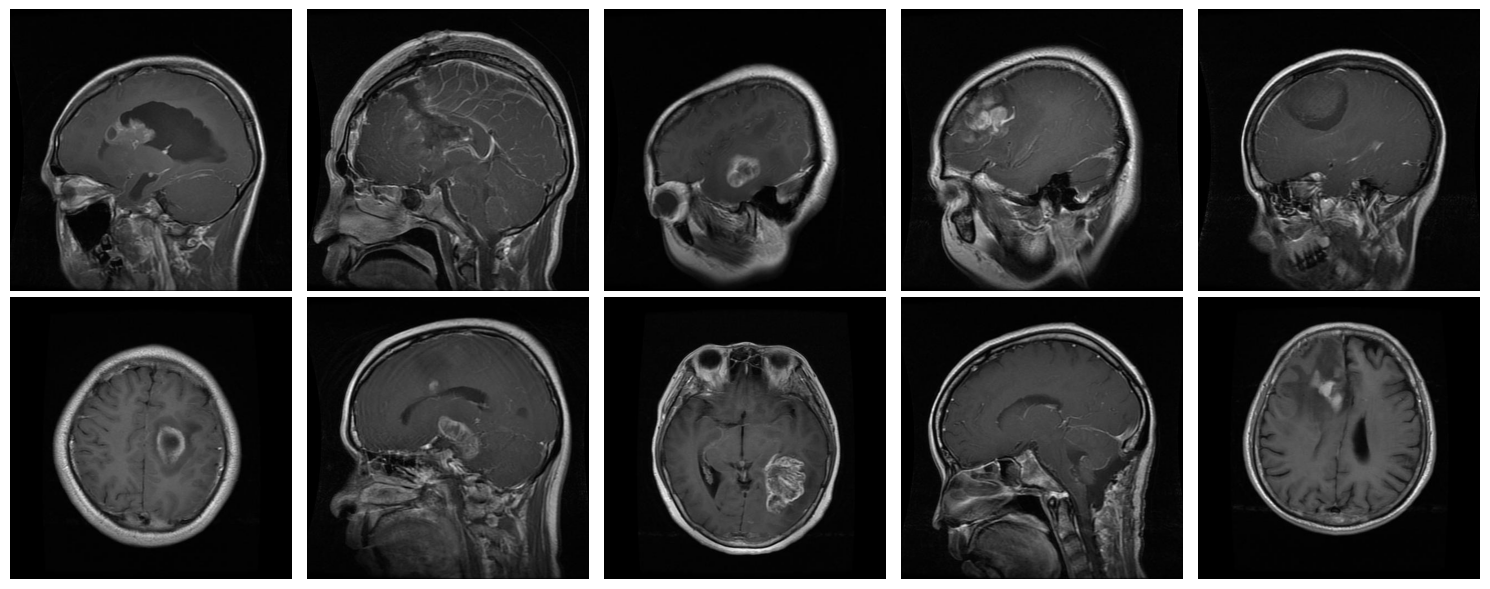

In [8]:
path_image= r'C:\Users\swapa\Documents\Brain Tumor Classification\Training\glioma_tumor'   #This line sets the variable path_image to the path of the directory containing the glioma tumor images.
fig, axes = plt.subplots(nrows=2, ncols=5, figsize=(15, 6)) #This line creates a new figure with 2 rows and 5 columns of subplots. The figure size is set to 15 inches wide and 6 inches high.
random_indices = random.sample(range(1, 101), 10)   #This line creates a list of 10 random indices between 1 and 100. These indices will be used to select which images to plot.

for i, idx in enumerate(random_indices, 1): #This line starts a for loop that will iterate over the random indices. The variable i will be used to keep track of the current index, and the variable idx will be used to store the index itself.
    file_path = os.path.join(path_image, f'gg ({idx}).jpg') #This line constructs the file path to the current image. The file path is constructed by joining the path_image directory path with the image name, which is gg ({idx}).jpg.
    image = Image.open(file_path)  #This line opens the image file. The Image.open() function returns an Image object, which is a Python representation of the image.
    subplot_row = (i - 1) // 5 #This line calculates the row index of the subplot to plot the image on. The row index is calculated by dividing the current index i by 5 and then rounding down to the nearest integer.
    subplot_col = (i - 1) % 5  #This line calculates the column index of the subplot to plot the image on. The column index is calculated by dividing the current index i by 5 and then taking the remainder.
    axes[subplot_row, subplot_col].imshow(image)  #This line plots the image on the subplot at the specified row and column indices. The imshow() function takes an Image object as input and displays the image on the current subplot.
    axes[subplot_row, subplot_col].axis('off')    #This line turns off the axes for the current subplot. This is done because we only want to display the images, not the axes.
plt.tight_layout()   #This line adjusts the layout of the subplots to ensure that there is no wasted space.
plt.show()

In [9]:
classes = {'glioma_tumor':0, 'meningioma_tumor':1, 'no_tumor':2, 'pituitary_tumor':3 }

# ADDING THE TRAINING AND TESTING DATA IN ONE SET AND DEFINING TARGET

In [10]:
X = []
Y = []   #This code creates two empty lists, X and Y.
for cls in classes:  #Iterate over the classes in the classes list.
    pth = source_path_train + '//' + cls  #Get the path to the training data for the current class.
    for j in os.listdir(pth):             #Iterate over the files in the training directory for the current class.
        img = cv2.imread(pth + '//' + j, 0) #Read the current image into memory.
        img = cv2.resize(img, (150, 150))   #Resize the current image to 150x150 pixels.
        X.append(img)                       #Add the current image to the X list.
        Y.append(classes[cls])              #Add the class label for the current image to the Y list.
for cls in classes:                         #Iterate over the classes in the classes list.
    pth = source_path_test + '//' + cls     # Get the path to the test data for the current class.
    for j in os.listdir(pth):               # Iterate over the files in the test directory for the current class.
        img = cv2.imread(pth + '//' + j, 0) #Read the current image into memory.
        img = cv2.resize(img, (150, 150))   #Resize the current image to 150x150 pixels.  
        X.append(img)                       #Add the current image to the X list.
        Y.append(classes[cls])              #Add the class label for the current image to the Y list.
X = np.array(X)                             #Convert the X list to a NumPy array.
Y = np.array(Y)                             #Convert the Y list to a NumPy array.
pd.Series(Y).value_counts()  #Create a Pandas Series from the Y array.
#Count the number of occurrences of each unique value in the Pandas Series.

1    937
0    926
3    901
2    500
dtype: int64

# UNIQUE VALUE COUNTS

In [11]:
np.unique(Y)   #The np.unique() function in Python returns the unique elements of an array. The function sorts the unique elements in ascending order.

array([0, 1, 2, 3])

# SHAPE OF X

In [12]:
X.shape     #The X.shape code in Python returns the shape of the X array. The shape of an array is a tuple that contains the number of elements in each dimension of the array. 

(3264, 150, 150)

# RESHAPE THE X

In [13]:
X_updated = X.reshape(len(X), -1) # The code X_updated = X.reshape(len(X), -1) reshapes the X array to have a single dimension. 
X_updated.shape

(3264, 22500)

# TRAIN TEST SPLIT

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X_updated, Y, random_state = 10, test_size = 0.20)  #The code X_train, X_test, y_train, y_test = train_test_split(X_updated, Y, random_state = 10, test_size = 0.20) splits the X_updated and Y arrays into training and test sets. The train_test_split() function is a function from the scikit-learn library that is used to split datasets into training and test sets.

# COUNTPLOT OF TRAIN AND TEST DATA

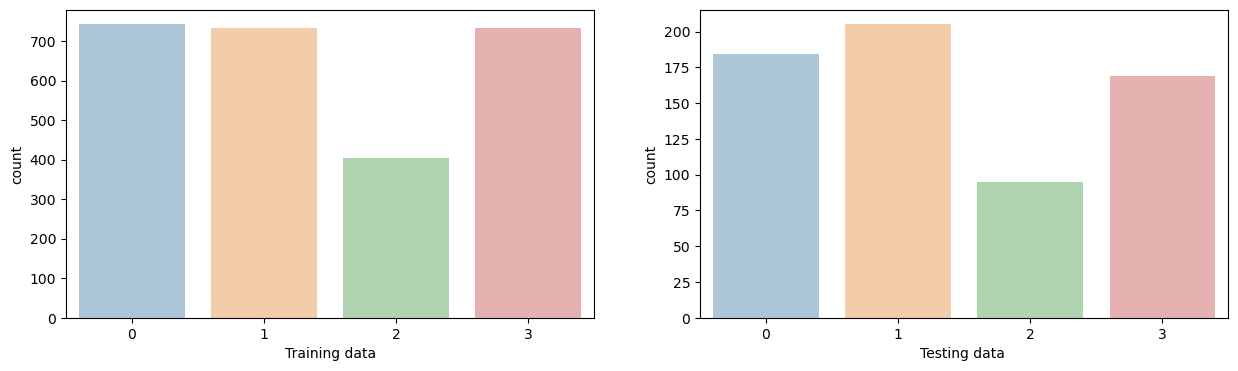

In [15]:
plt.figure(figsize = (15,4));      #This line creates a new figure with a width of 15 inches and a height of 4 inches.
lis = ['Training data', 'Testing data ']   #This line creates a list of two strings, 'Training data' and 'Testing data'.
for i,j in enumerate([y_train, y_test]):   #This line iterates over the list [y_train, y_test] and assigns the index of each element to i and the element itself to j.
    plt.subplot(1,2, i+1);               #This line creates a subplot in the current figure. The first argument, 1, specifies the number of rows in the grid of subplots. The second argument, 2, specifies the number of columns in the grid of subplots. The third argument, i+1, specifies the index of the subplot within the grid.
    sns.countplot(x = j,alpha=0.4 );    #This line creates a countplot of the variable j. The alpha parameter specifies the transparency of the bars in the plot.
    plt.xlabel(lis[i])                  #This line sets the x-axis label of the current subplot to the string at index i in the list lis.

In [16]:
print(X_train.shape, X_test.shape)   # It is printing the shapes of the training and testing data, respectively. 

(2611, 22500) (653, 22500)


In [17]:
X_train_updated = X_train.reshape(len(X_train), -1)
X_test_updated = X_test.reshape(len(X_test), -1)
X_train_updated.shape ,X_test_updated.shape   #The code X_train_updated = X_train.reshape(len(X_train), -1) and X_test_updated = X_test.reshape(len(X_test), -1) is reshaping the training and testing data to have two dimensions. The first dimension represents the number of samples in the data, and the second dimension represents the number of features in each sample.

((2611, 22500), (653, 22500))

In [18]:
print(X_train_updated.max(), X_train_updated.min())  #It  is printing the maximum and minimum values of the training data.
print(X_test_updated.max(), X_test_updated.min())     #It  is printing the maximum and minimum values of the testing data.
X_train_updated = X_train_updated/255  #The code X_train_updated = X_train_updated/255 is normalizing the training  data by dividing each value by 255. This means that all of the values in the training data will be between 0 and 1.
X_test_updated = X_test_updated/255    #The code X_test_updated = X_test_updated/255 is normalizing the testing  data by dividing each value by 255. This means that all of the values in the testing data will be between 0 and 1.
print(X_train_updated.max(), X_train_updated.min())
print(X_test_updated.max(), X_test_updated.min())

255 0
255 0
1.0 0.0
1.0 0.0


In [19]:
names = []
accuracies = []
finalResults = []  # it  is creating three empty lists: names, accuracies, and finalResults.

# MODEL BUILDING

# LOGISTIC REGRESSION

In [20]:
lg = LogisticRegression(C=0.1)  #This line creates a new logistic regression model with a regularization parameter of 0.1.
lg.fit(X_train_updated, y_train) #This line trains the logistic regression model on the X_train_updated and y_train data.
y_pred =lg.predict(X_test_updated) #This line predicts the labels of the X_test_updated data using the trained logistic regression model.
accuracy = accuracy_score( y_test,y_pred) #This line calculates the accuracy of the logistic regression model on the X_test_updated and y_test data.
CM = confusion_matrix(y_test, y_pred)  #This line calculates the confusion matrix of the logistic regression model on the X_test_updated and y_test data.
print("Accuracy : ", accuracy * 100, '%') #This line prints the accuracy of the logistic regression model to the console.
ClassificationReport = classification_report(y_test,y_pred)  #This line calculates the classification report of the logistic regression model on the X_test_updated and y_test data.
print('Classification Report is : ', ClassificationReport )  #This line prints the classification report of the logistic regression model to the console.
name ='Logistic Regression'  #This line creates a string variable called name and assigns it the value 'Logistic Regression'.
names.append(name)  #This line appends the name variable to the names list.
accuracies.append(accuracy) #This line appends the accuracy variable to the accuracies list.
finalResults.append((name,accuracy))  #This line appends a tuple containing the name and accuracy variables to the finalResults list.

Accuracy :  78.71362940275651 %
Classification Report is :                precision    recall  f1-score   support

           0       0.70      0.71      0.70       184
           1       0.74      0.70      0.72       205
           2       0.80      0.82      0.81        95
           3       0.92      0.96      0.94       169

    accuracy                           0.79       653
   macro avg       0.79      0.80      0.79       653
weighted avg       0.78      0.79      0.79       653



# CONFUSION MATRIX PLOT

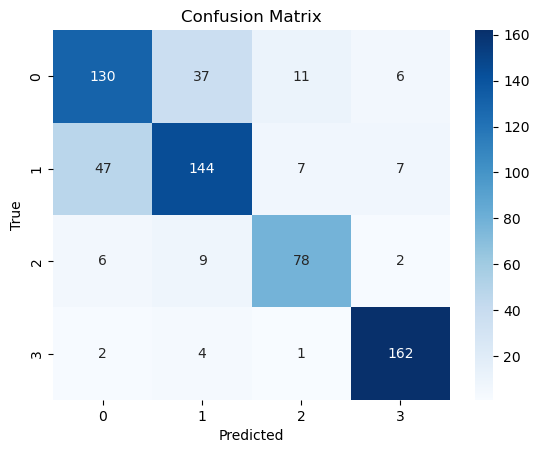

In [21]:
sns.heatmap(CM, annot=True, fmt="d", cmap="Blues") #This line creates a heatmap of the confusion matrix CM. The annot argument specifies whether to annotate the heatmap with the values of the confusion matrix. The fmt argument specifies the format of the annotations where d means integer format. The cmap argument specifies the colormap to use for the heatmap.
plt.title("Confusion Matrix") #This line sets the title of the plot to "Confusion Matrix".
plt.xlabel("Predicted")  #This line sets the x-axis label of the plot to "Predicted".
plt.ylabel("True")  #This line sets the y-axis label of the plot to "True".
plt.show() #This line displays the plot.

# RANDOM FOREST CLASSIFICATION

In [22]:
rf = RandomForestClassifier(n_estimators=10, random_state=42)  #This line creates a random forest classifier object with 10 estimators and a random state of 42. The random state is used to ensure that the results are reproducible.
rf.fit(X_train_updated, y_train)   #This line trains the random forest classifier on the training data, which is represented by the X_train_updated and y_train variables.
y_pred =rf.predict(X_test_updated)  #This line makes predictions on the test data, which is represented by the X_test_updated variable. The predictions are stored in the y_pred variable.
accuracy = accuracy_score( y_test,y_pred)  #This line calculates the accuracy of the random forest classifier on the test data using the accuracy_score() function. The accuracy is a measure of how well the classifier performed on the unseen test data.
CM_rf = confusion_matrix(y_test, y_pred)   #This line calculates the confusion matrix of the random forest classifier on the test data using the confusion_matrix() function. The confusion matrix is a table that shows the number of correct and incorrect predictions made by the classifier.
print("Accuracy : ", accuracy * 100, '%')   #This line prints the accuracy of the random forest classifier to the console.
ClassificationReport = classification_report(y_test,y_pred)  #This line calculates the classification report of the random forest classifier on the test data using the classification_report() function. The classification report is a table that shows the precision, recall, F1-score, and support for each class.
print('Classification Report is : ', ClassificationReport )  #This line prints the classification report of the random forest classifier to the console.
name ='Random Forest' #These lines append the name and accuracy of the random forest classifier to the names, accuracies, and finalResults lists. These lists can be used to compare the performance of the random forest classifier to other classifiers.
names.append(name)
accuracies.append(accuracy)
finalResults.append((name,accuracy))

Accuracy :  85.60490045941806 %
Classification Report is :                precision    recall  f1-score   support

           0       0.90      0.76      0.82       184
           1       0.82      0.86      0.84       205
           2       0.80      0.91      0.85        95
           3       0.90      0.93      0.92       169

    accuracy                           0.86       653
   macro avg       0.85      0.86      0.86       653
weighted avg       0.86      0.86      0.86       653



# CONFUSION MATRIX PLOT

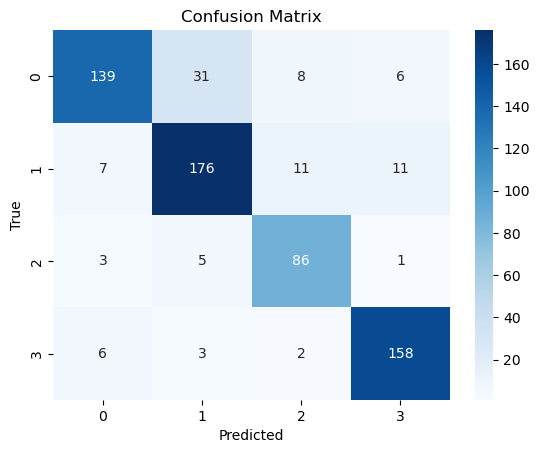

In [23]:
sns.heatmap(CM_rf, annot=True, fmt="d", cmap="Blues")  #This line of code creates a heatmap of the confusion matrix stored in the variable CM_rf. The annot parameter is set to True to display the values in each cell of the heatmap. The fmt parameter is set to d to format the values as integers. The cmap parameter is set to "Blues" to use the Blues colormap.
plt.title("Confusion Matrix")   #This line of code sets the title of the plot to "Confusion Matrix".
plt.xlabel("Predicted")  #This line of code sets the x-axis label of the plot to "Predicted".
plt.ylabel("True")   #This line of code sets the y-axis label of the plot to "True".
plt.show() #This line of code displays the plot.

# SUPPORT VECTOR MACHINE

In [24]:
svm = SVC(kernel='rbf')   #This line creates a new SVM classifier object with the RBF kernel. The RBF kernel is a non-linear kernel that can be used to learn complex relationships between the features in the data.
svm.fit(X_train_updated, y_train)   #This line trains the SVM classifier on the training data, which is stored in the variables X_train_updated and y_train.
y_pred =svm.predict(X_test_updated) #This line makes predictions on the test data, which is stored in the variable X_test_updated. The predictions are stored in the variable y_pred.
accuracy = accuracy_score( y_test,y_pred)  #This line calculates the accuracy of the SVM classifier on the test data. The accuracy is the proportion of correct predictions made by the classifier.
CM_svm = confusion_matrix(y_test, y_pred)  #This line calculates the confusion matrix for the SVM classifier on the test data. The confusion matrix is a table that shows the number of correct and incorrect predictions made by the classifier for each class.
print("Accuracy : ", accuracy * 100, '%')  #This line prints the accuracy of the SVM classifier to the console.
ClassificationReport = classification_report(y_test,y_pred) #This line calculates the classification report for the SVM classifier on the test data. The classification report is a table that shows the precision, recall, F1-score, and support for each class.
print('Classification Report is : ', ClassificationReport )  #This line prints the classification report for the SVM classifier to the console.
name ='SVM'  #This line creates a variable called name and assigns it the string SVM.
names.append(name) #This line appends the value of the name variable to the names list.
accuracies.append(accuracy)  #This line appends the value of the accuracy variable to the accuracies list.
finalResults.append((name,accuracy))  #This line appends a tuple containing the name and accuracy variables to the finalResults list.

Accuracy :  80.85758039816233 %
Classification Report is :                precision    recall  f1-score   support

           0       0.78      0.72      0.75       184
           1       0.77      0.77      0.77       205
           2       0.84      0.80      0.82        95
           3       0.86      0.95      0.90       169

    accuracy                           0.81       653
   macro avg       0.81      0.81      0.81       653
weighted avg       0.81      0.81      0.81       653



# CONFUSION MATRIX

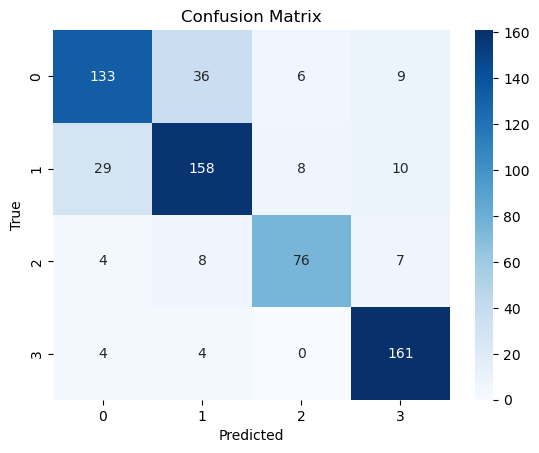

In [25]:
sns.heatmap(CM_svm, annot=True, fmt="d", cmap="Blues") #This line plots a heatmap of the confusion matrix stored in the variable CM_svm. The annot=True argument tells Seaborn to annotate the heatmap with the values of the confusion matrix. The fmt="d" argument tells Seaborn to format the values as integers. The cmap="Blues" argument tells Seaborn to use the Blues colormap.
plt.title("Confusion Matrix")  #This line sets the title of the plot to "Confusion Matrix".
plt.xlabel("Predicted") #This line sets the x-axis label of the plot to "Predicted".
plt.ylabel("True")  #This line sets the y-axis label of the plot to "True".
plt.show()    #This line displays the plot.


# KNN CLASSIFICATION

In [26]:
knn = KNeighborsClassifier(n_neighbors=10)  #This line creates a new KNN classifier object, with the number of neighbors set to 10. This means that the classifier will use the 10 most similar training data points to predict the class of a new data point.
knn.fit(X_train_updated, y_train)    #This line trains the KNN classifier on the training data, which is represented by the X_train_updated and y_train variables. The X_train_updated variable contains the feature values of the training data, and the y_train variable contains the corresponding target values.
y_pred =knn.predict(X_test_updated)  # This line predicts the class of the test data, which is represented by the X_test_updated variable. The X_test_updated variable contains the feature values of the test data. The output of this line is the predicted class labels for the test data, stored in the y_pred variable.
accuracy = accuracy_score( y_test,y_pred)  #This line calculates the accuracy of the KNN classifier on the test data. The accuracy_score() function takes the true class labels (stored in y_test) and the predicted class labels (stored in y_pred) as input and returns the accuracy as a percentage.
CM_knn = confusion_matrix(y_test, y_pred)  #This line calculates the confusion matrix for the KNN classifier on the test data. The confusion_matrix() function takes the true class labels (stored in y_test) and the predicted class labels (stored in y_pred) as input and returns a confusion matrix.
print("Accuracy : ", accuracy * 100, '%')  # This line prints the accuracy of the KNN classifier to the console.
ClassificationReport = classification_report(y_test,y_pred)  #This line calculates the classification report for the KNN classifier on the test data. The classification_report() function takes the true class labels (stored in y_test) and the predicted class labels (stored in y_pred) as input and returns a classification report.
print('Classification Report is : ', ClassificationReport )  #This line prints the classification report to the console.
name ='KNN'  #These lines create a new variable called name and set it to the string "KNN". The append() method is then used to add the name variable to the names list.
names.append(name)
accuracies.append(accuracy)  #This line appends the accuracy of the KNN classifier to the accuracies list.
finalResults.append((name,accuracy))  #This line appends a tuple containing the name and accuracy variables to the finalResults list.

Accuracy :  68.1470137825421 %
Classification Report is :                precision    recall  f1-score   support

           0       0.62      0.81      0.70       184
           1       0.80      0.38      0.52       205
           2       0.56      0.64      0.60        95
           3       0.76      0.93      0.84       169

    accuracy                           0.68       653
   macro avg       0.69      0.69      0.66       653
weighted avg       0.71      0.68      0.66       653



# CONFUSION MATRIX PLOT

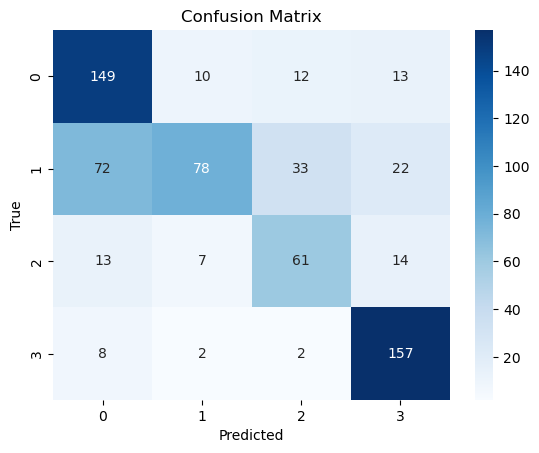

In [27]:
sns.heatmap(CM_knn, annot=True, fmt="d", cmap="Blues")  # This line creates a heatmap of the confusion matrix CM_knn. The annot=True argument tells Seaborn to annotate each cell of the heatmap with the corresponding value from the confusion matrix. The fmt="d" argument specifies that the annotations should be formatted as integers. The cmap="Blues" argument specifies that the Blues colormap should be used to color the heatmap.
plt.title("Confusion Matrix")  #This line sets the title of the heatmap to "Confusion Matrix".
plt.xlabel("Predicted")        #This line sets the x-axis label of the heatmap to "Predicted".
plt.ylabel("True")             #This line sets the y-axis label of the heatmap to "True".
plt.show()                     #This line displays the heatmap.

# NAIVE BAYES CLASSIFIER

In [28]:
nv =GaussianNB()  #This line creates an instance of the Gaussian Naive Bayes classifier.
nv.fit(X_train_updated, y_train)   #This line fits the classifier to the training data. The training data is represented by two variables: X_train_updated and y_train. X_train_updated is a NumPy array containing the feature values of the training data, and y_train is a NumPy array containing the target values of the training data.
y_pred =nv.predict(X_test_updated)   #This line predicts the target values of the test data using the trained classifier. The test data is represented by the variable X_test_updated. X_test_updated is a NumPy array containing the feature values of the test data.
accuracy = accuracy_score( y_test,y_pred)  #This line calculates the accuracy of the classifier on the test data. The accuracy is calculated by comparing the predicted target values (y_pred) to the actual target values (y_test).
CM_nv= confusion_matrix(y_test, y_pred)    #This line calculates the confusion matrix of the classifier on the test data. The confusion matrix is a table that shows the number of correct and incorrect predictions made by the classifier.
print("Accuracy : ", accuracy * 100, '%')  #This line prints the accuracy of the classifier to the console.
ClassificationReport = classification_report(y_test,y_pred)  #This line calculates the classification report of the classifier on the test data. The classification report is a table that shows the precision, recall, F1-score, and support for each class.
print('Classification Report is : ', ClassificationReport )   #This line prints the classification report to the console.
name ='NaiveBayes'   #This line creates a variable called name and assigns it the string value NaiveBayes.
names.append(name)   #This line appends the variable name to the list names.
accuracies.append(accuracy)  #This line appends the variable accuracy to the list accuracies.
finalResults.append((name,accuracy))  #This line appends a tuple containing the variables name and accuracy to the list finalResults.

Accuracy :  48.698315467075034 %
Classification Report is :                precision    recall  f1-score   support

           0       0.39      0.86      0.54       184
           1       0.39      0.05      0.09       205
           2       0.49      0.52      0.51        95
           3       0.82      0.59      0.68       169

    accuracy                           0.49       653
   macro avg       0.52      0.50      0.46       653
weighted avg       0.52      0.49      0.43       653



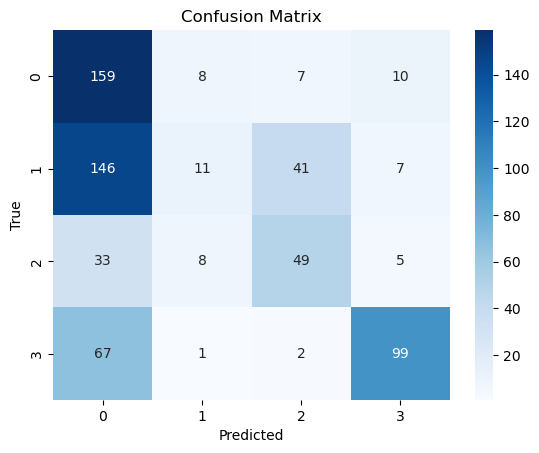

In [29]:
sns.heatmap(CM_nv, annot=True, fmt="d", cmap="Blues")  #This line plots the confusion matrix CM_nv using a heatmap. The annot parameter specifies whether to annotate the heatmap with the cell values. The fmt parameter specifies the format string for the cell values. The cmap parameter specifies the colormap to use for the heatmap.
plt.title("Confusion Matrix")   #This line sets the title of the plot to "Confusion Matrix".
plt.xlabel("Predicted")         #This line sets the x-axis label of the plot to "Predicted".
plt.ylabel("True")              #This line sets the y-axis label of the plot to "True".
plt.show()                      #This line displays the plot.

# COMPARISON BETWEEN MODELS

In [30]:
finalResults_df = pd.DataFrame({'Model': names, 'Accuracy': accuracies})
finalResults_df

,Model,Accuracy
0,Logistic Regression,0.787136
1,Random Forest,0.856049
2,SVM,0.808576
3,KNN,0.681470
4,NaiveBayes,0.486983


# From the above comparison we can see that Random Forest is working better than other models which is around 85% followed by SVM with 81% accuracy

In [31]:
def read_data(path1,path2,image_size = 150):  #This defines a function called read_data(), which takes three arguments:
 # path1: The path to the first directory containing images.
 # path2: The path to the second directory containing images.
# image_size: The desired size of the images, in pixels.
    X = []  #This creates two empty lists: X and y. X will store the images, and y will store the corresponding labels.
    y = []
    labels = os.listdir(path1)  # This gets a list of all the subdirectories in path1. These subdirectories are the different classes of images.
    for label in labels:  #This iterates over the list of labels.
        for image in tqdm(os.listdir(path1 + label)):  #This iterates over the list of images in each label subdirectory.
            img = cv2.imread(os.path.join(path1 + label,image))  #This reads the image file at the specified path.
            img = cv2.resize(img,(image_size, image_size))       #This resizes the image to the specified size.
            X.append(img) #This appends the image and label to the corresponding lists.
            y.append(label)
    for label in labels:  #This repeats the process above for the images in path2.
        for image in tqdm(os.listdir(path2 + label)):
            img = cv2.imread(os.path.join(path2 + label,image))
            img = cv2.resize(img,(image_size, image_size))
            X.append(img)
            y.append(label)
            
    return np.array(X), np.array(y)  #This converts the X and y lists to NumPy arrays and returns them.
X_train, y_train = read_data(source_path_train,source_path_test) #This calls the read_data() function to read the training images and labels.
X_train, y_train = shuffle(X_train, y_train, random_state=45)  #This shuffles the training images and labels together, using a random seed of 45.
X_test, y_test= read_data(source_path_test ,source_path_test )  #his calls the read_data() function to read the test images and labels.
X_test, y_test = shuffle(X_test, y_test, random_state=45)   #This shuffles the test images and labels together, using a random seed of 45.

100%|█████████████████████████████████████████████████████████████████████████████████| 74/74 [00:00<00:00, 165.48it/s]


In [32]:
print(f"X Train shape is --> {X_train.shape}\ny Train shape is --> {y_train.shape}\nX Test shape is --> {X_test.shape}\ny Test shape is --> {y_test.shape}")

# prints the shape of the training and test data to the console. The f string syntax is used to insert the values of the variables X_train, y_train, X_test, and y_test into the formatted string.

X Train shape is --> (3264, 150, 150, 3)
y Train shape is --> (3264,)
X Test shape is --> (788, 150, 150, 3)
y Test shape is --> (788,)


In [33]:
labels = os.listdir(source_path_train)  #This line of code creates a list of all the labels in the training set. The os.listdir() function returns a list of all the files and directories in a given directory. In this case, the directory is the training set directory.
y_train_new = []  #This line of code creates a new list to store the converted labels.
for i in y_train:  #This line of code starts a for loop that iterates over the training set labels.
    y_train_new.append(labels.index(i))  #This line of code appends the index of the current label to the new list. The labels.index() function returns the index of the given label in the list.
y_train=y_train_new   #This line of code overwrites the original training set labels with the converted labels.
y_train = tf.keras.utils.to_categorical(y_train)  #This line of code converts the training set labels to categorical integers. The tf.keras.utils.to_categorical() function converts a list of integers to a matrix of integers, where each row represents a one-hot encoded vector.
labels = os.listdir(source_path_test)
y_test_new = []
for i in y_test:
    y_test_new.append(labels.index(i))
y_test=y_test_new
y_test = tf.keras.utils.to_categorical(y_test)

In [34]:
labels

['glioma_tumor', 'meningioma_tumor', 'no_tumor', 'pituitary_tumor']

In [35]:
np.unique(y_train)

array([0., 1.], dtype=float32)

In [36]:
np.unique(y_test)

array([0., 1.], dtype=float32)

In [37]:
print(X_train.max(), X_train.min())
print(X_test.max(), X_test.min())  # These lines of code print the maximum and minimum values of the training and test sets, respectively. This is useful for understanding the range of values that the features in the dataset have.
X_train = X_train/255
X_test = X_test/255  # These lines of code normalize the training and test sets, respectively. Normalization is done by dividing each value in the dataset by the maximum value. This scales the values of all features to the range [0, 1].
print(X_train.max(), X_train.min())
print(X_test.max(), X_test.min())  # These lines of code print the maximum and minimum values of the training and test sets after normalization. As you can see, the maximum value of all features is now 1 and the minimum value of all features is now 0.

255 0
255 0
1.0 0.0
1.0 0.0


# CNN MODEL BUILDING

In [38]:
def create_model():   #This line defines the function create_model().
  
    model = tf.keras.models.Sequential([  #This line creates a new sequential model. A sequential model is a type of model in Keras where the layers are stacked one after the other, with the output of each layer being the input to the next layer.
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)),  #This line adds a convolutional layer to the model. The convolutional layer has 32 filters, each of size 3x3. The activation function for the convolutional layer is relu. The input shape to the convolutional layer is (150, 150, 3), which means that the input images are 150x150 pixels with 3 channels (RGB)
    tf.keras.layers.MaxPooling2D(2, 2),   #This line adds a max pooling layer to the model. The max pooling layer has a pooling size of 2x2, which means that the output of the max pooling layer will be half the size of the input.
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),  #This line adds another convolutional layer to the model, with 64 filters.
    tf.keras.layers.MaxPooling2D(2, 2),  #This line adds another max pooling layer to the model.
    tf.keras.layers.Conv2D(128, (3, 3), activation='relu'), #This line adds another convolutional layer to the model, with 128 filters.
    tf.keras.layers.MaxPooling2D(2, 2),  #This line adds another max pooling layer to the model.
    tf.keras.layers.Flatten(),  #This line adds a flatten layer to the model. The flatten layer converts the output of the convolutional layers into a one-dimensional vector.This line adds a flatten layer to the model. The flatten layer converts the output of the convolutional layers into a one-dimensional vector.
    tf.keras.layers.Dense(512, activation='relu'), #This line adds a fully connected layer to the model with 512 units. The activation function for the fully connected layer is relu.
    tf.keras.layers.Dense(256, activation='relu'),  #This line adds another fully connected layer to the model, with 256 units.
    tf.keras.layers.Dense(4, activation="softmax")  #This line adds a final fully connected layer to the model with 4 units. The activation function for the final layer is softmax. The softmax activation function is used for classification problems, as it outputs a probability distribution over the different classes.
    ])
   


  

    return model  #This line returns the model.

In [39]:
X_train = tf.constant(X_train)  #converts the NumPy arrays X_train and y_train to TensorFlow tensors, respectively.
y_train = tf.constant(y_train)

In [40]:
model = create_model()  #This line creates a new machine learning model using the create_model() function that you defined earlier.
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])   #This line compiles the model. Compiling the model involves specifying the optimizer, loss function, and metrics to use during training.
#Adaptive Moment Estimation Adam is a popular stochastic gradient descent optimizer used in machine learning and deep learning. It is an algorithm that can be used to update the weights of a neural network iteratively based on training data. Adam is often used in deep learning because it is computationally efficient, has little memory requirement, and is well suited for problems that are large in terms of data or parameters. 
#The optimizer is the algorithm that will be used to update the model's parameters during training. In this case, the adam optimizer is used.
#The loss function is used to measure how well the model is performing on the training data. In this case, the binary_crossentropy loss function is used, which is commonly used for classification problems.
#The metrics are used to evaluate the performance of the model on the training data. In this case, the accuracy metric is used.
history = model.fit(X_train, y_train, epochs=20, validation_split=0.1)  #This line trains the model on the training data. The fit() method takes the following arguments

#X_train: The training data input features.
#y_train: The training data target outputs.
#epochs: The number of training epochs.
#validation_split: The fraction of the training data to use for validation.

model.save('brain_tumor_model.h5')    ###for saving the model for gui first run it then uncomment it 

Epoch 1/20
92/92 [==============================] - 69s 716ms/step - loss: 0.4254 - accuracy: 0.5822 - val_loss: 0.3720 - val_accuracy: 0.5994
Epoch 2/20
92/92 [==============================] - 61s 661ms/step - loss: 0.2452 - accuracy: 0.7909 - val_loss: 0.2186 - val_accuracy: 0.8257
Epoch 3/20
92/92 [==============================] - 60s 657ms/step - loss: 0.1505 - accuracy: 0.8815 - val_loss: 0.1898 - val_accuracy: 0.8287
Epoch 4/20
92/92 [==============================] - 62s 672ms/step - loss: 0.0841 - accuracy: 0.9438 - val_loss: 0.1820 - val_accuracy: 0.8777
Epoch 5/20
92/92 [==============================] - 64s 698ms/step - loss: 0.0502 - accuracy: 0.9660 - val_loss: 0.1557 - val_accuracy: 0.9113
Epoch 6/20
92/92 [==============================] - 62s 671ms/step - loss: 0.0291 - accuracy: 0.9816 - val_loss: 0.1384 - val_accuracy: 0.9327
Epoch 7/20
92/92 [==============================] - 60s 649ms/step - loss: 0.0083 - accuracy: 0.9963 - val_loss: 0.1660 - val_accuracy: 0.9297

25/25 [==============================] - 4s 131ms/step


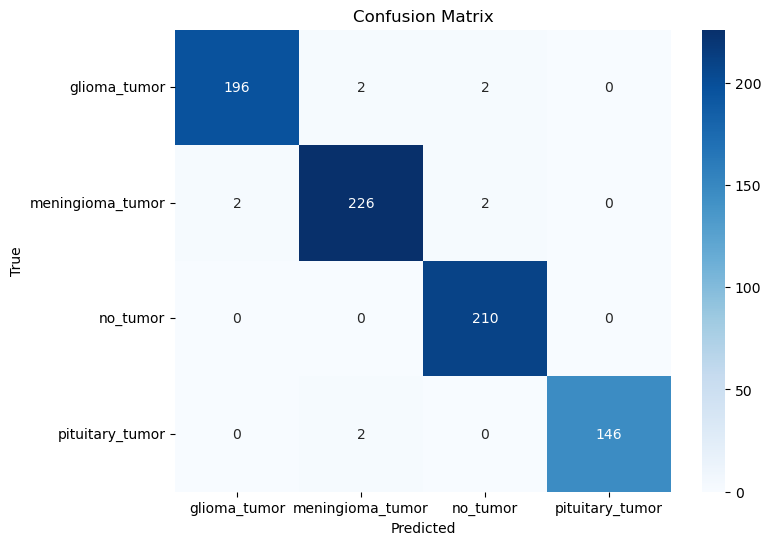

Classification Report:
                   precision    recall  f1-score   support

    glioma_tumor       0.99      0.98      0.98       200
meningioma_tumor       0.98      0.98      0.98       230
        no_tumor       0.98      1.00      0.99       210
 pituitary_tumor       1.00      0.99      0.99       148

        accuracy                           0.99       788
       macro avg       0.99      0.99      0.99       788
    weighted avg       0.99      0.99      0.99       788



In [44]:
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt
y_test_original = np.argmax(y_test, axis=1)
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
conf_matrix = confusion_matrix(y_test_original, y_pred_classes)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

# Generate classification report
class_report = classification_report(y_test_original, y_pred_classes, target_names=labels)
print("Classification Report:\n", class_report)


20/20 - 3s - loss: 0.0375 - accuracy: 0.9873 - 3s/epoch - 158ms/step
Test accuracy: 0.9873096346855164


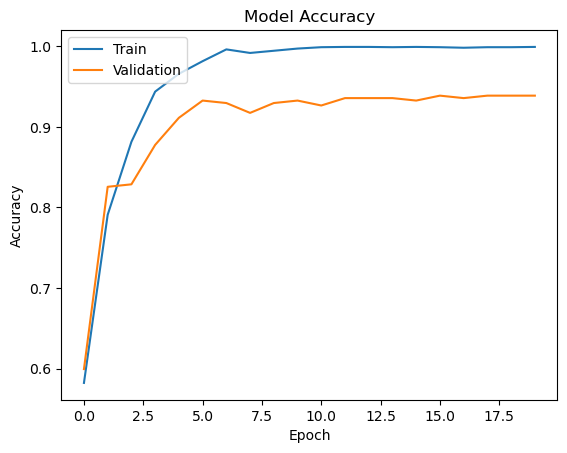

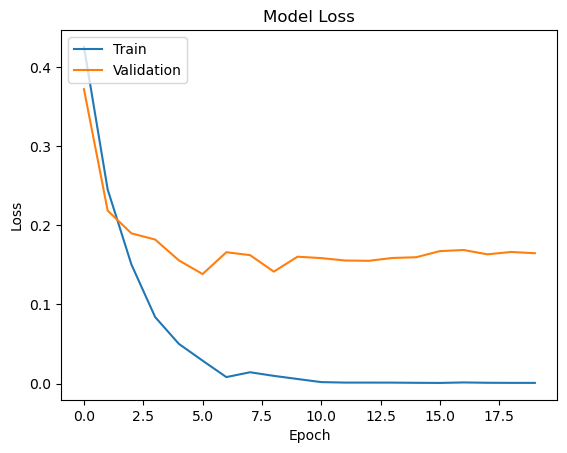

In [41]:
test_loss, test_acc = model.evaluate(X_test, y_test, verbose=2, batch_size=40)  #This line evaluates the performance of the model on the test set. The evaluate() method takes the following arguments:
#X_test: The test data input features.
#y_test: The test data target outputs.
#verbose: An integer that controls the amount of output generated during evaluation. In this case, verbose=2 is used, which means that the loss and accuracy on the test set will be printed to the console.
#batch_size: The number of samples to process in a batch during evaluation.
#The evaluate() method returns two values: the loss and accuracy on the test set.

print('Test accuracy:', test_acc)  #This line prints the test accuracy to the console.

plt.plot(history .history['accuracy']) # The history.history['accuracy'] and history.history['val_accuracy'] arrays contain the training and validation accuracy values, respectively.
plt.plot(history .history['val_accuracy'])  #The history.history dictionary contains the loss and accuracy values for the training and validation data at each epoch.
plt.title('Model Accuracy')  #The plt.title(), plt.ylabel(), and plt.xlabel() functions are used to set the title, y-axis label, and x-axis label of the plot, respectively.
#The plt.legend() function is used to add a legend to the plot.
#The plt.show() function displays the plot.
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])   #This code plots the training and validation loss curves, using the same approach as the code for plotting the accuracy curves.
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

1/1 [==============================] - 0s 448ms/step


3

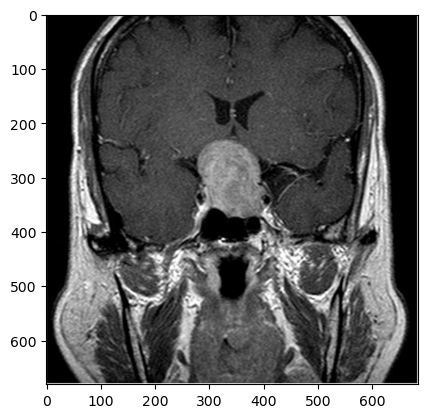

In [42]:
img = cv2.imread(r"C:\Users\swapa\Documents\Brain Tumor Classification\Testing\pituitary_tumor\image(11).jpg")  #This line loads the image at the specified path into a variable called img. The cv2.imread() function is a function from the OpenCV library that reads images.
plt.imshow(img)  #This line displays the image loaded in the previous line using the Matplotlib library. The plt.imshow() function displays images in a figure.
img = cv2.resize(img,(150,150))  #This line resizes the image to a resolution of 150x150 pixels using the cv2.resize() function.
img_array = np.array(img)  #This line converts the image to a NumPy array using the np.array() function. NumPy arrays are efficient data structures for storing and manipulating numerical data.
img_array=img_array.reshape(1,150,150,3)   #This line reshapes the NumPy array to a shape of (1, 150, 150, 3). This shape is required for the model to make a prediction.

a=model.predict(img_array)  #This line makes a prediction on the image using the trained model. The model.predict() function takes the image array as input and returns a NumPy array containing the predicted probabilities for each class.
indices = a.argmax() #This line finds the index of the class with the highest predicted probability. The a.argmax() function returns the index of the largest element in the NumPy array.
indices

# GUI BUILDING

In [1]:
import tkinter as tk   # Import the tkinter library and alias it as tk for easier usage.
from tkinter import filedialog  # Import the filedialog module from tkinter, which allows you to open file dialogs for selecting files.
from PIL import Image, ImageTk  #Import the Image and ImageTk modules from the Pillow (PIL) library, which are used for working with images.
import numpy as np   #Import the NumPy library and alias it as np, which is commonly used for numerical operations, including image processing.
import tensorflow as tf  # Import the TensorFlow library for machine learning.

# Load the saved model
model = tf.keras.models.load_model('brain_tumor_model.h5')

# Create a function to make predictions
def predict_image():
    file_path = filedialog.askopenfilename()
    image = Image.open(file_path)
    image = image.resize((150, 150))
    image = np.array(image)
    image = image / 255.0

    prediction = model.predict(np.expand_dims(image, axis=0))

    tumor_types = ["Glioma Tumor", "Meningioma Tumor", "No Tumor", "Pituitary Tumor"]
    predicted_tumor = tumor_types[np.argmax(prediction)]

    result_label.config(text=f"Predicted Tumor Type: {predicted_tumor}")

# Create the GUI window
window = tk.Tk()
window.title("Brain Tumor Type Detection")

# Set the window size
window.geometry("400x400")

# Create a label for the title
title_label = tk.Label(window, text="Brain Tumor Type Detection", font=("Helvetica", 20), padx=20, pady=10)
title_label.pack()

# Create an image placeholder
image_placeholder = tk.Label(window)
image_placeholder.pack(pady=20)

# Create a button to upload an MRI image
upload_button = tk.Button(window, text="Upload MRI Image", command=predict_image, bg="lightblue", padx=20)
upload_button.pack()

# Create a label to display the prediction
result_label = tk.Label(window, text="", font=("Helvetica", 16))
result_label.pack()

# Center the window on the screen
window.eval('tk::PlaceWindow . center')

# Start the GUI
window.mainloop()

1/1 [==============================] - 1s 540ms/step
